In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_csv('heart_failure_dataset.csv')
data.head(15)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75.0        0                       582         0                 20   
1   55.0        0                      7861         0                 38   
2   65.0        0                       146         0                 20   
3   50.0        1                       111         0                 20   
4   65.0        1                       160         1                 20   
5   90.0        1                        47         0                 40   
6   75.0        1                       246         0                 15   
7   60.0        1                       315         1                 60   
8   65.0        0                       157         0                 65   
9   80.0        1                       123         0                 35   
10  75.0        1                        81         0                 38   
11  62.0        0                       231         0                 25   
12  45.0        1                       981         0                 30   
13  50.0        1                       168         0                 38   
14  49.0        1                        80         0                 30   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                     1  265000.00               1.9           130    1   
1                     0  263358.03               1.1           136    1   
2                     0  162000.00               1.3           129    1   
3                     0  210000.00               1.9           137    1   
4                     0  327000.00               2.7           116    0   
5                     1  204000.00               2.1           132    1   
6                     0  127000.00               1.2           137    1   
7                     0  454000.00               1.1           131    1   
8                     0  263358.03               1.5           138    0   
9                     1  388000.00               9.4           133    1   
10                    1  368000.00               4.0           131    1   
11                    1  253000.00               0.9           140    1   
12                    0  136000.00               1.1           137    1   
13                    1  276000.00               1.1           137    1   
14                    1  427000.00               1.0           138    0   

    smoking  time  DEATH_EVENT  
0         0     4            1  
1         0     6            1  
2         1     7            1  
3         0     7            1  
4         0     8            1  
5         1     8            1  
6         0    10            1  
7         1    10            1  
8         0    10            1  
9         1    10            1  
10        1    10            1  
11        1    10            1  
12        0    11            1  
13        0    11            1  
14        0    12            0

In [3]:
data.tail(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
289  90.0        1                       337         0                 38   
290  45.0        0                       615         1                 55   
291  60.0        0                       320         0                 35   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
289                    0   390000.0               0.9           144    0   
290                    0   222000.0               0.8           141    0   
291                    0   133000.0               1.4           139    1   
292                    0   382000.0               1.0           140    1   
293                    0   179000.0               0.9           136    1   
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
289        0   256            0  
290        0   257            0  
291        0   258            0  
292        1   258            0  
293        1   270            0  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
data.dropna()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.corr()

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

In [9]:
for feature in data.columns:
    print(feature, ':', len(data[feature].unique()))

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


In [10]:
discrete_features, continuous_features = [], []
for feature in data.columns:
    if feature == 'DEATH_EVENT':
        label = ['DEATH_EVENT']
    elif len(data[feature].unique()) >= 10:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)

print('Discrete: ', discrete_features, '\n', 'Continuous', continuous_features)

Discrete:  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'] 
 Continuous ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


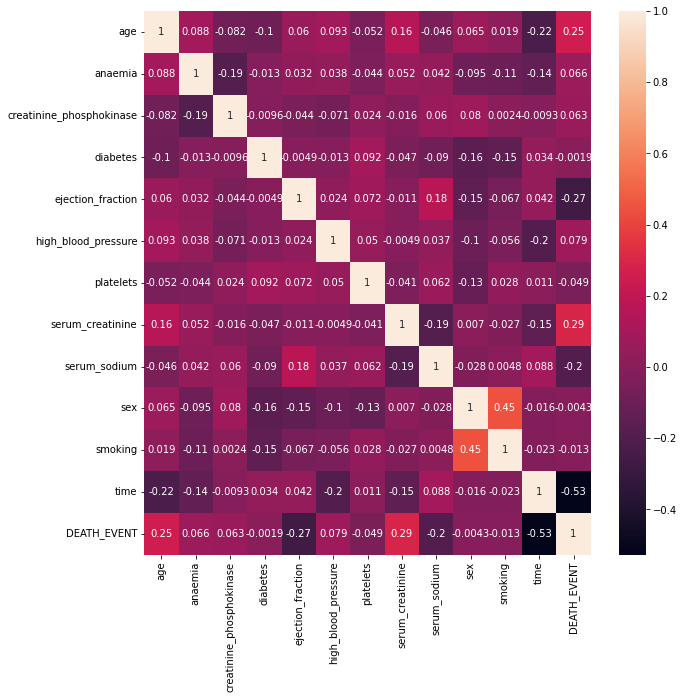

In [11]:
correlation = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.show()

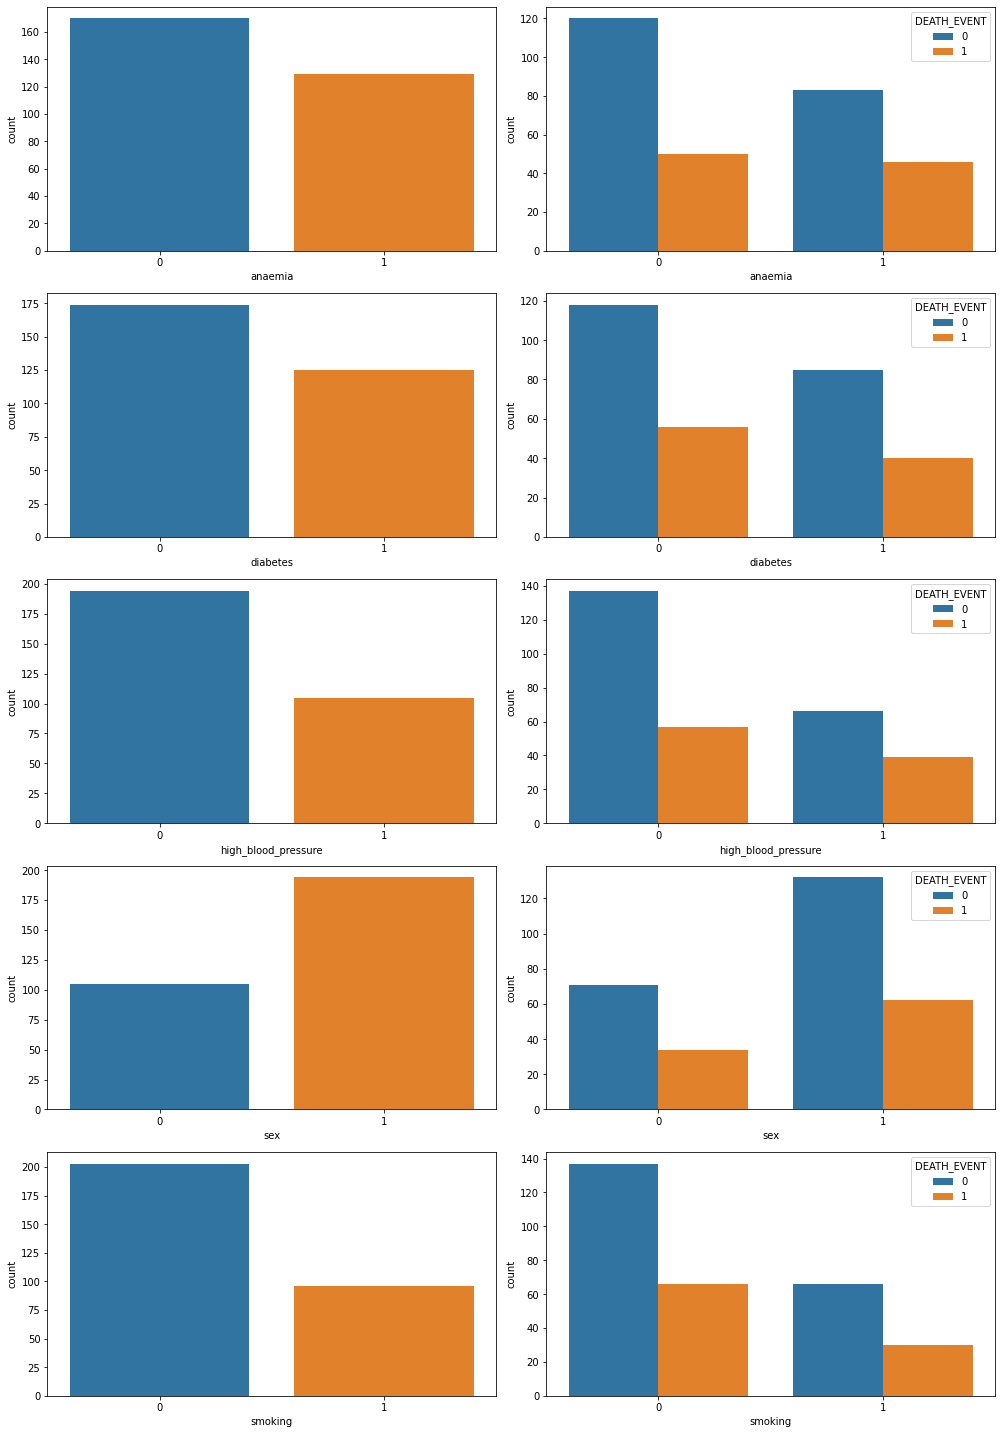

In [12]:
fig, ax = plt.subplots(len(discrete_features), 2, figsize=(14,20))

for i in range(len(discrete_features)):
    sns.countplot(ax=ax[i, 0], x=discrete_features[i], data=data)
    sns.countplot(ax=ax[i, 1], x=discrete_features[i], hue='DEATH_EVENT', data=data)
fig.tight_layout(pad=1)
plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

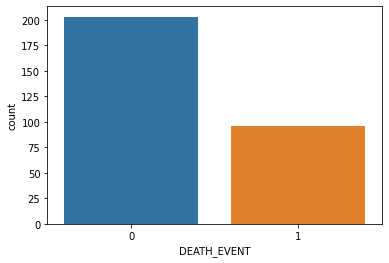

In [13]:
sns.countplot(x='DEATH_EVENT', data=data)

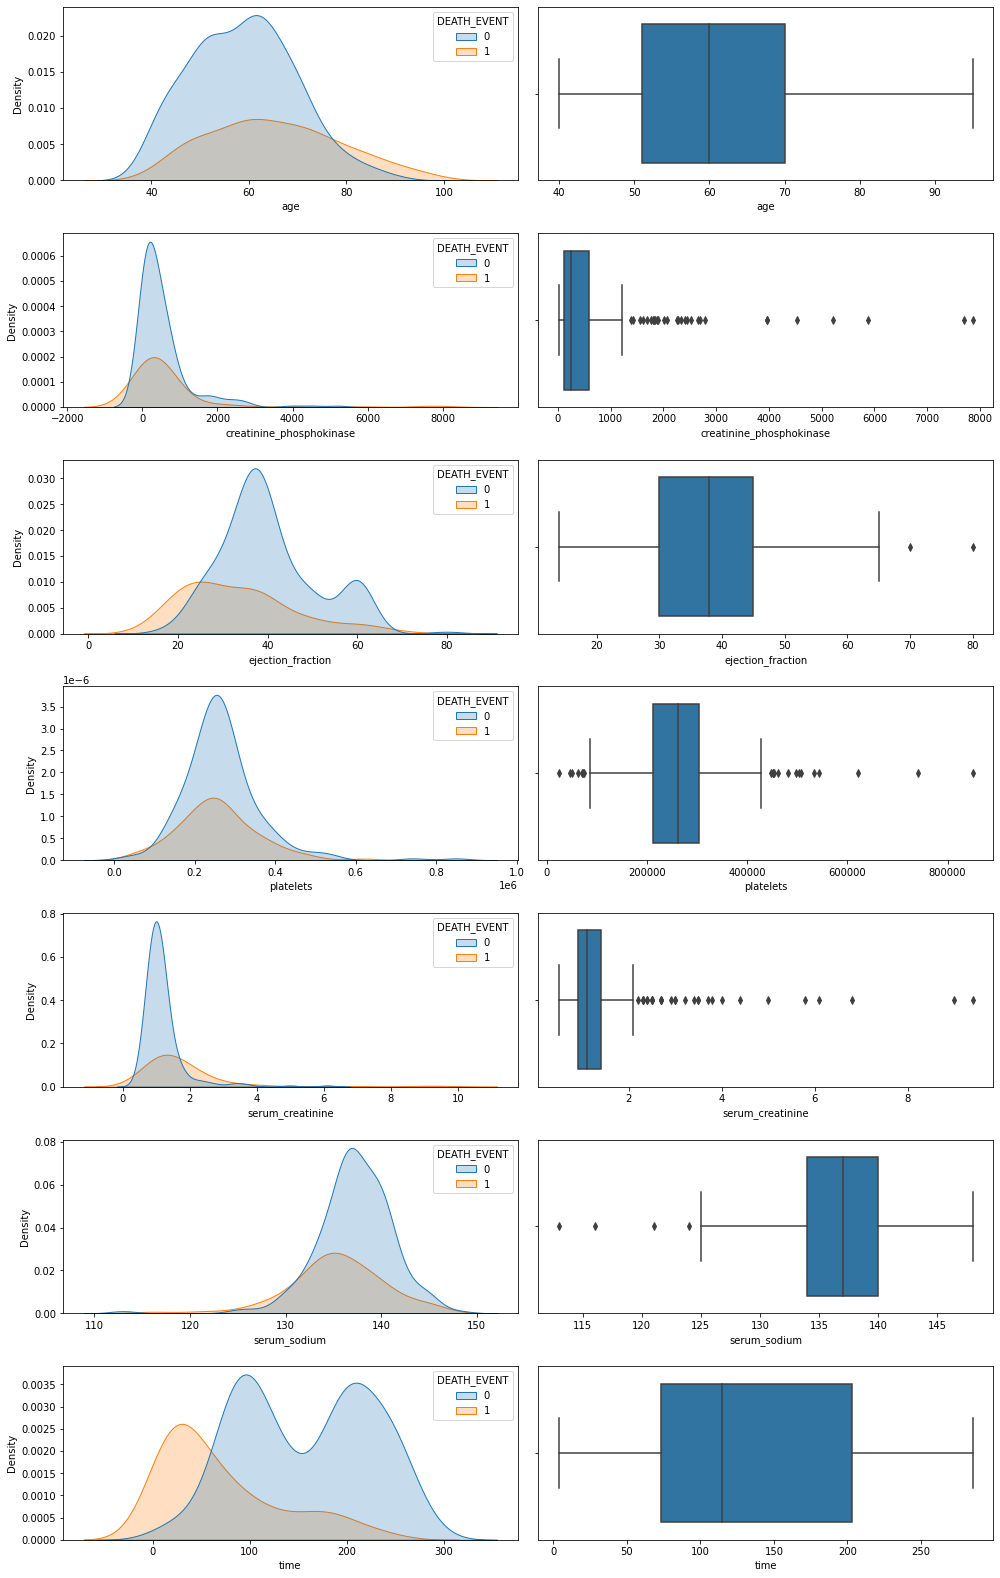

In [14]:
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(14,22))

for i in range(len(continuous_features)):
    sns.kdeplot(ax=ax[i, 0], x=continuous_features[i], hue='DEATH_EVENT', data=data, fill = True)
    sns.boxplot(ax=ax[i, 1], x=continuous_features[i], data=data)
fig.tight_layout(pad=1)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import chi2, SelectFromModel, SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
import xgboost

In [16]:
best_features = SelectKBest(chi2, k=10)
features_ranking = best_features.fit(data.drop(['DEATH_EVENT'], axis=1), data['DEATH_EVENT'])
ranking_dictionary = {}
for i in range(len(features_ranking.scores_)):
    ranking_dictionary[data.columns[i]] = round(features_ranking.scores_[i], 3)

asc_sort = sorted(ranking_dictionary.items(), key = lambda kv:(kv[1], kv[0]))

for i, j in asc_sort:
    print(i, ':', j)

diabetes : 0.001
sex : 0.002
smoking : 0.032
anaemia : 0.747
high_blood_pressure : 1.222
serum_sodium : 1.618
serum_creatinine : 19.814
age : 44.619
ejection_fraction : 79.073
creatinine_phosphokinase : 1897.315
time : 3826.893
platelets : 26135.772


In [17]:
feature_model = SelectFromModel(Lasso(alpha=0.05, random_state=0))
feature_model.fit(data.drop(['DEATH_EVENT'], axis=1), data['DEATH_EVENT'])

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [18]:
mask = feature_model.get_support() 
for i in range(len(mask)):
    if not mask[i]:
        print(data.drop(['DEATH_EVENT'], axis=1).columns[i])

anaemia
diabetes
high_blood_pressure
platelets
sex
smoking


In [19]:
#Remove Outliers

X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(239, 12) (60, 12)


In [20]:
features_with_outliers = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']

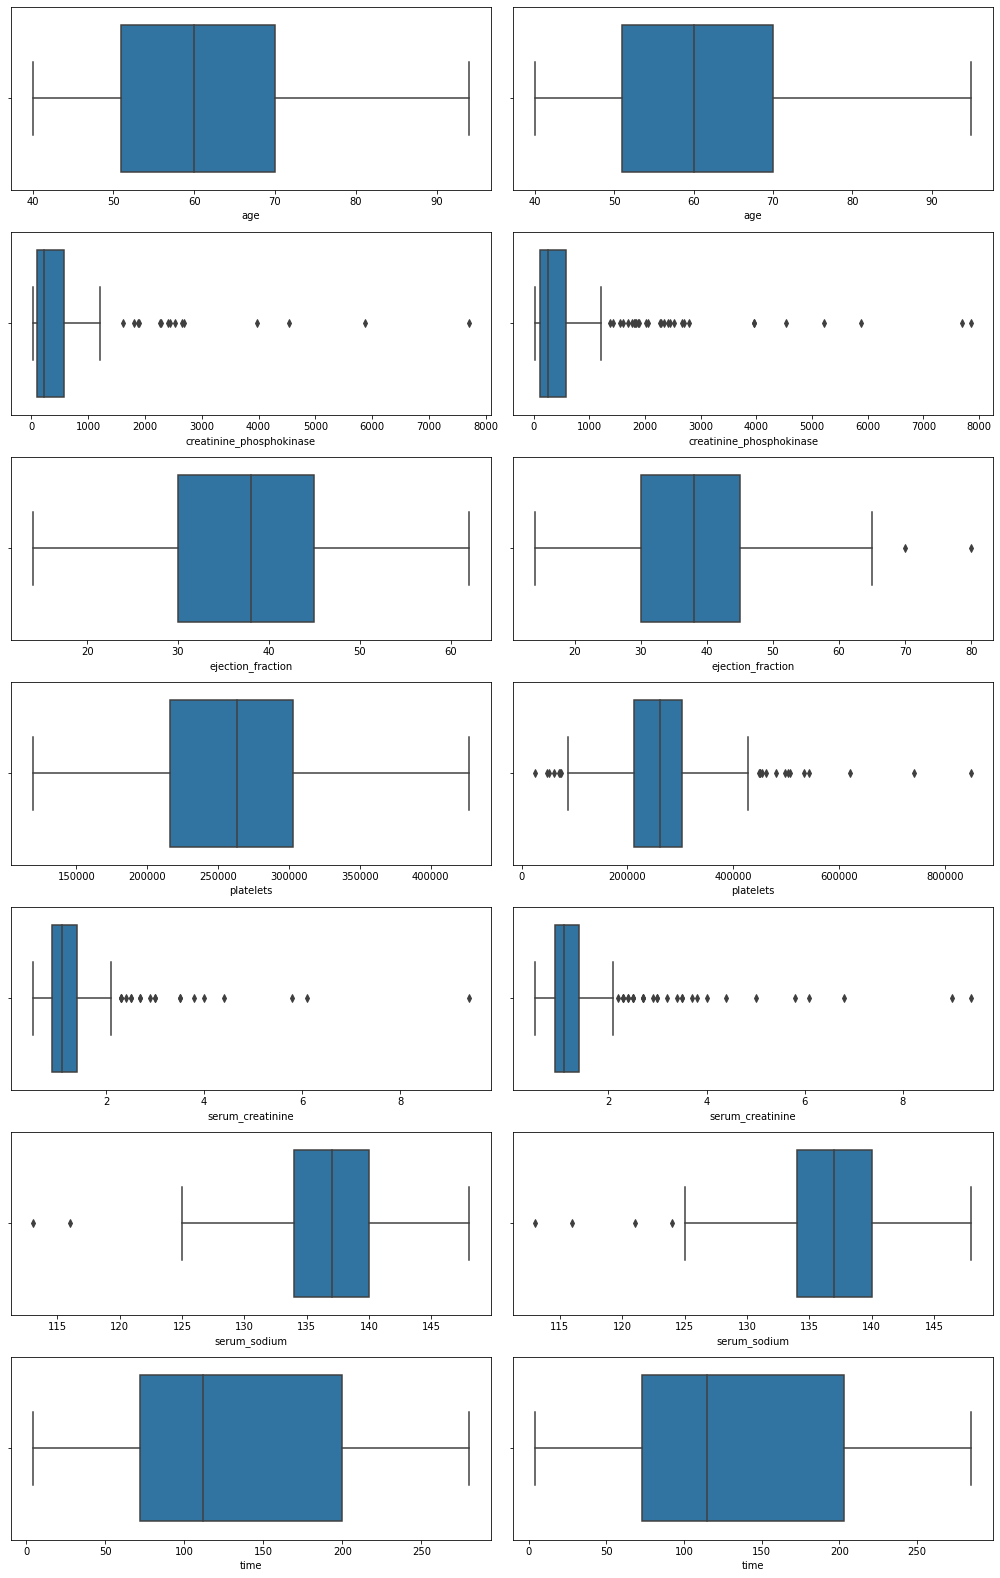

In [21]:
lof = LocalOutlierFactor()
outlier_rows = lof.fit_predict(X_train)

mask = outlier_rows != -1
X_train, y_train = X_train[mask], y_train[mask]
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(14,22))

for i in range(len(continuous_features)):
    sns.boxplot(ax=ax[i, 0], x=continuous_features[i], data=X_train)
    sns.boxplot(ax=ax[i, 1], x=continuous_features[i], data=data)
fig.tight_layout(pad=1)
plt.show()

In [22]:
#Model Building without Sampling Technique
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The accuracy of Logistic Regression is :  76.66666666666667 %
              precision    recall  f1-score   support

           0       0.73      0.97      0.84        37
           1       0.91      0.43      0.59        23

    accuracy                           0.77        60
   macro avg       0.82      0.70      0.71        60
weighted avg       0.80      0.77      0.74        60



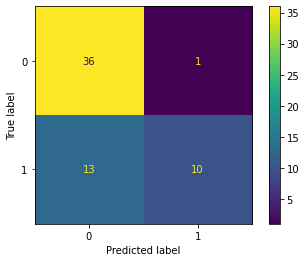

In [23]:
#Model Building without Sampling Technique
#Logistic_Regression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Random Forest is :  81.66666666666667 %
              precision    recall  f1-score   support

           0       0.80      0.95      0.86        37
           1       0.88      0.61      0.72        23

    accuracy                           0.82        60
   macro avg       0.84      0.78      0.79        60
weighted avg       0.83      0.82      0.81        60



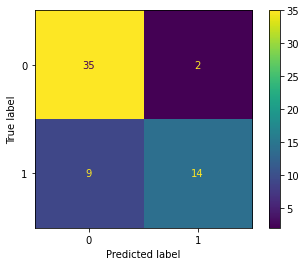

In [24]:
#Model Building without Sampling Technique
#Random_Forest

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [25]:
#Trying to work with different sets of attributes based on the observations made

X = data[['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time']]
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

lof = LocalOutlierFactor()
outlier_rows = lof.fit_predict(X_train)

mask = outlier_rows != -1
X_train, y_train = X_train[mask], y_train[mask]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(239, 5) (60, 5)


The accuracy of Logistic Regression is :  86.66666666666667 %
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.76      0.76      0.76        17

    accuracy                           0.87        60
   macro avg       0.84      0.84      0.84        60
weighted avg       0.87      0.87      0.87        60



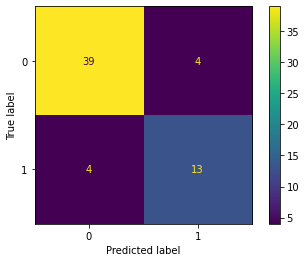

In [26]:
#Prediction using Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Gradient Boost is :  91.66666666666666 %
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.88      0.82      0.85        17

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



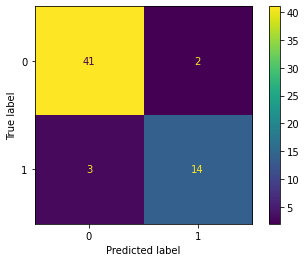

In [27]:
#Prediction using GradientBoosting Classifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Gradient Boost is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [28]:
#Conclusion: Elimination of few features 
#Considering creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, time,
#<---Accuracy Percentage---->
#Logistic Regression (87%)
#Random Forest (91%)
#Gradient Boosting(91%)
#DecisionTreeClassifier(81.67%)
#SupportVectorMachines(91.67%)
#NaiveBayes(86.67%)

In [29]:
X = data[['ejection_fraction', 'serum_creatinine', 'time']]
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

lof = LocalOutlierFactor()
outlier_rows = lof.fit_predict(X_train)

mask = outlier_rows != -1
X_train, y_train = X_train[mask], y_train[mask]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(239, 3) (60, 3)


The accuracy of Logistic Regression is :  90.0 %
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.87      0.76      0.81        17

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.90      0.90      0.90        60



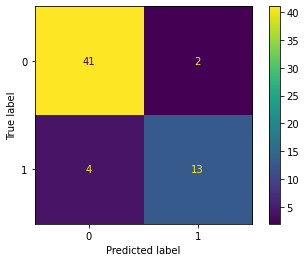

In [30]:
#Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Random Forest is :  88.33333333333333 %
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.86      0.71      0.77        17

    accuracy                           0.88        60
   macro avg       0.87      0.83      0.85        60
weighted avg       0.88      0.88      0.88        60



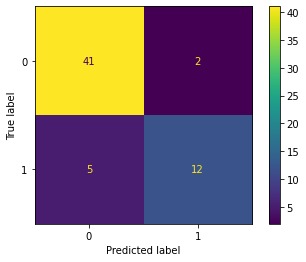

In [31]:
#RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Gradient Boost is :  90.0 %
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.79      0.88      0.83        17

    accuracy                           0.90        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.91      0.90      0.90        60



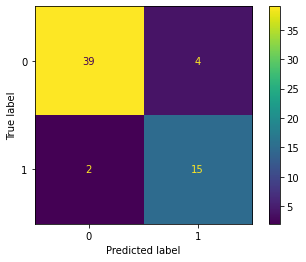

In [32]:
#GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Gradient Boost is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Decision Tree is :  81.66666666666667 %
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.67      0.71      0.69        17

    accuracy                           0.82        60
   macro avg       0.77      0.78      0.78        60
weighted avg       0.82      0.82      0.82        60



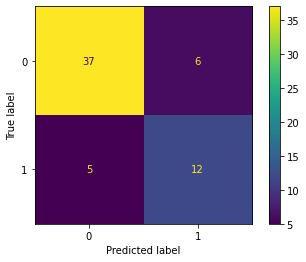

In [33]:
#DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Decision Tree is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of SupportVectorMachines is :  91.66666666666666 %
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.88      0.82      0.85        17

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



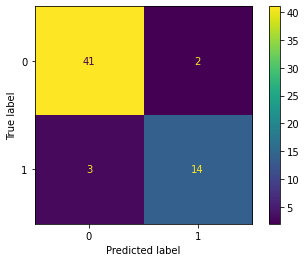

In [34]:
#SupportVectorMachines

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of SupportVectorMachines is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of NaiveBayes is :  86.66666666666667 %
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.80      0.71      0.75        17

    accuracy                           0.87        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.86      0.87      0.86        60



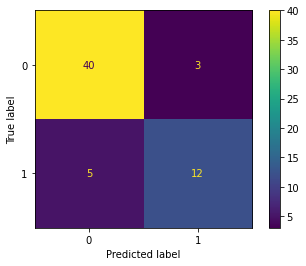

In [35]:
#NaiveBayes

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of NaiveBayes is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [36]:
#Models Building using Sampling Technique

X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

lof = LocalOutlierFactor()
outlier_rows = lof.fit_predict(X_train)

mask = outlier_rows != -1
X_train, y_train = X_train[mask], y_train[mask]

oversample = RandomOverSampler(sampling_strategy='minority')
X_sampled, y_train = oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_sampled)
X_test = scaler.transform(X_test)


(239, 12) (60, 12)
Counter({0: 142, 1: 142})


In [37]:
#Models Building using Sampling Technique Accuracy Results
#Logistic_Regression(85%)
#Random_Forest(85%)
#NaiveBayes(78.3%)

The accuracy of Logistic Regression is :  80.0 %
              precision    recall  f1-score   support

           0       0.80      0.89      0.85        37
           1       0.79      0.65      0.71        23

    accuracy                           0.80        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.80      0.80      0.80        60



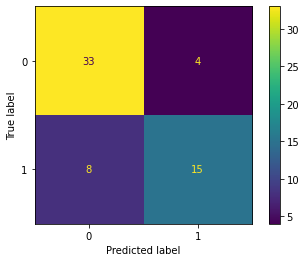

In [38]:
#Models Building using Sampling Technique
#LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Random Forest is :  81.66666666666667 %
              precision    recall  f1-score   support

           0       0.80      0.95      0.86        37
           1       0.88      0.61      0.72        23

    accuracy                           0.82        60
   macro avg       0.84      0.78      0.79        60
weighted avg       0.83      0.82      0.81        60



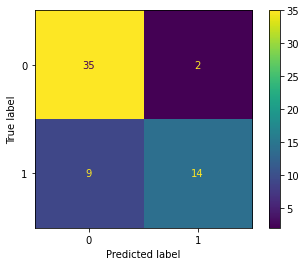

In [39]:
#Models Building using Sampling Technique
#RandomForest

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Naive Bayes is :  78.33333333333333 %
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        37
           1       0.78      0.61      0.68        23

    accuracy                           0.78        60
   macro avg       0.78      0.75      0.76        60
weighted avg       0.78      0.78      0.78        60



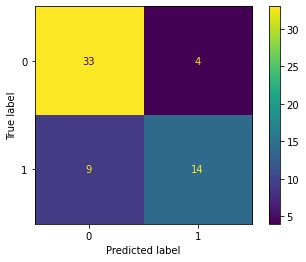

In [40]:
#Models Building using Sampling Technique
#NaiveBayes

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Naive Bayes is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [41]:
#Models Building using Sampling Technique
#Considering all the features, the accuracy with Logistic Regression is 78% and Random Forest is 85%
#Trying with different sets of features based on the above observations
#Results: LogisticRegression(76.67%), RandomForest(80.00%), GradientBoosting(86.67%), NaiveBayes(78.33%), DecisionTree(83.3%), GradientBoosting(86.67%)


In [42]:
X = data[['ejection_fraction', 'serum_creatinine', 'time']]
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lof = LocalOutlierFactor()
outlier_rows = lof.fit_predict(X_train)

mask = outlier_rows != -1
X_train, y_train = X_train[mask], y_train[mask]

oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The accuracy of Logistic Regression is :  81.66666666666667 %
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.77      0.74      0.76        23

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60



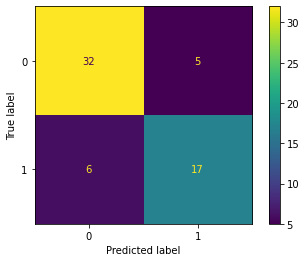

In [43]:
#logistic_Regression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Random Forest is :  81.66666666666667 %
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.80      0.70      0.74        23

    accuracy                           0.82        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.82      0.82      0.81        60



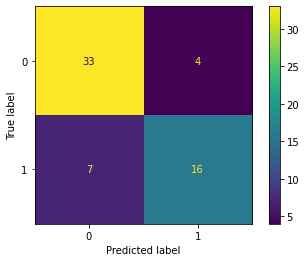

In [44]:
#RandomForest

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Gradient Boost is :  86.66666666666667 %
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        37
           1       0.86      0.78      0.82        23

    accuracy                           0.87        60
   macro avg       0.86      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60



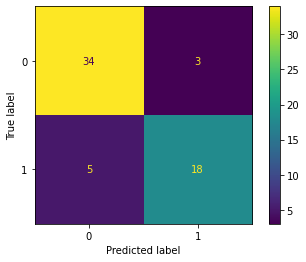

In [45]:
#GradientBoosting 

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Gradient Boost is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Naive Bayes is :  83.33333333333334 %
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        37
           1       0.81      0.74      0.77        23

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



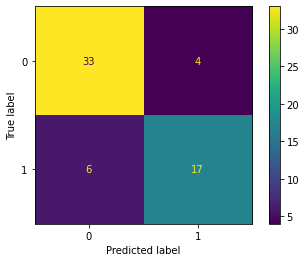

In [46]:
#NaiveBayes

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Naive Bayes is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Decision Tree is :  80.0 %
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.76      0.70      0.73        23

    accuracy                           0.80        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.80      0.80      0.80        60



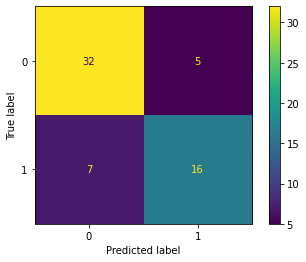

In [47]:
#DecisionTree

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Decision Tree is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [48]:
#Oversampling using SMOTE imblearn
#Model Building with SMOTE imblearn

In [49]:
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lof = LocalOutlierFactor()
outlier_rows = lof.fit_predict(X_train)

mask = outlier_rows != -1
X_train, y_train = X_train[mask], y_train[mask]

oversample = SMOTE(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
#Results: LogisticRegression (80%), RandomForest(86.67%),GradientBoosting(81.67%) DecisionTree(65%), SupportVectorMachines(85%), NaiveBayes(73%)


The accuracy of Logistic Regression is :  80.0 %
              precision    recall  f1-score   support

           0       0.80      0.89      0.85        37
           1       0.79      0.65      0.71        23

    accuracy                           0.80        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.80      0.80      0.80        60



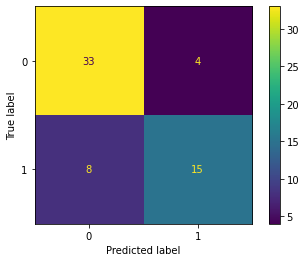

In [52]:
#Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Random Forest is :  86.66666666666667 %
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        37
           1       0.86      0.78      0.82        23

    accuracy                           0.87        60
   macro avg       0.86      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60



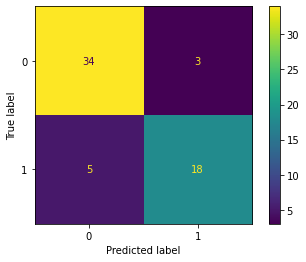

In [53]:
#RandomForest

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Decision Tree is :  71.66666666666667 %
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        37
           1       0.65      0.57      0.60        23

    accuracy                           0.72        60
   macro avg       0.70      0.69      0.69        60
weighted avg       0.71      0.72      0.71        60



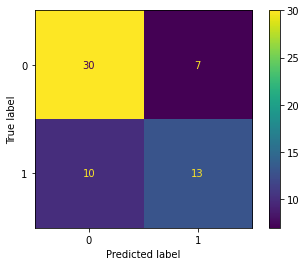

In [54]:
#Decision Tree

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Decision Tree is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Gradient Boosting is :  83.33333333333334 %
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        37
           1       0.84      0.70      0.76        23

    accuracy                           0.83        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.83      0.83      0.83        60



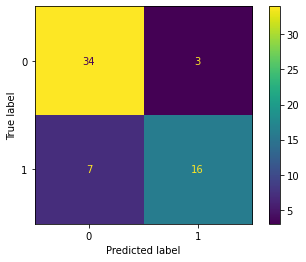

In [55]:
#GradientBoosting

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Gradient Boosting is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Support Vector Machines is :  83.33333333333334 %
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        37
           1       0.81      0.74      0.77        23

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



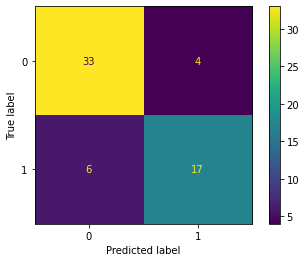

In [56]:
#SupportVectorMachines

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Support Vector Machines is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Naive Bayes is :  75.0 %
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        37
           1       0.75      0.52      0.62        23

    accuracy                           0.75        60
   macro avg       0.75      0.71      0.72        60
weighted avg       0.75      0.75      0.74        60



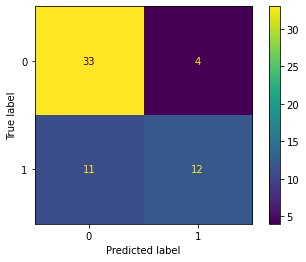

In [57]:
#Naive Bayes

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Naive Bayes is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [58]:
#Using Repeated KFold Sampling Method

In [59]:
#K-fold sampling based on ejection_fraction, serum_creatinine, time

X = data[['ejection_fraction', 'serum_creatinine', 'time']]
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lof = LocalOutlierFactor()
outlier_rows = lof.fit_predict(X_train)

mask = outlier_rows != -1
X_train, y_train = X_train[mask], y_train[mask]

oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#RandomForest

model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
score = cross_val_score(model, X_train, y_train, cv=cv)
print(score)
print(score.mean())

In [ ]:
#GradientBoosting

model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
score = cross_val_score(model, X_train, y_train, cv=cv)
print(score)
print(score.mean())

In [ ]:
#SupportVectorMachines

model = SVC()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
score = cross_val_score(model, X_train, y_train, cv=cv)
print(score)
print(score.mean())

In [ ]:
#DecisionTree

model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
score = cross_val_score(model, X_train, y_train, cv=cv)
print(score)
print(score.mean())

In [ ]:
#NaiveBayes

model = GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
score = cross_val_score(model, X_train, y_train, cv=cv)
print(score)
print(score.mean())

In [ ]:
#K-fold sampling based on ejection_fraction, serum_creatinine, time to predict Death

X = data[['ejection_fraction', 'serum_creatinine', 'time']]
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lof = LocalOutlierFactor()
outlier_rows = lof.fit_predict(X_train)

mask = outlier_rows != -1
X_train, y_train = X_train[mask], y_train[mask]

oversample = SMOTE(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#RandomForest

model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
score = cross_val_score(model, X_train, y_train, cv=cv)
print(score)
print(score.mean())

In [ ]:
#GradientBoosting

model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
score = cross_val_score(model, X_train, y_train, cv=cv)
print(score)
print(score.mean())

In [ ]:
#DecisionTree

model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
score = cross_val_score(model, X_train, y_train, cv=cv)
print(score)
print(score.mean())

In [ ]:
#SupportVectorMachines

model = SVC()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
score = cross_val_score(model, X_train, y_train, cv=cv)
print(score)
print(score.mean())

In [ ]:
model = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
score = cross_val_score(model, X_train, y_train, cv=cv)
print(score)
print(score.mean())